# Discussion 7

### NLP with Logistic Regression

Thursday, February 20th, 2025

## Introduction
In this week’s discussion section, we will use a dataset containing tweets related to different disasters. For each observation (tweet), there is an outcome variable that classifies the disasters talked about in the tweet as real (1), or not (0). Rather than having multiple predictors as our X, we will have one predictor - the tweet. However, each individual word can be thought of as their own predictor, each contributing to predicting our outcome variable.

## Data
The dataset this week is a commonly used dataset for NLP (Natural Language Processing). The dataset can be found here. Disasters.csv includes a text variable, which contains the tweet as a string. Our target variable, target, is a binary outcome variable with 1 representing the disaster discussed as real, and 0 representing the disaster discussed as not real.

## Excercise

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
disaster = pd.read_csv('/Users/jcsibley/MEDS/eds-232/EDS232-discussion/data/disaster.csv')

## Clean text data 

In [3]:
# Cleaning text data
def preprocess(text): # important to standardize text for model accuracy
    text = text.lower() # convert text to lowercase 
    text=  text.strip()  # remove leading and trailing spaces
    text=  re.sub(r'<.*?>','', text) # remove html syntax 
    text = re.sub(r'[^\w\s]','',text) # remove punctuation 
    text = re.sub(r'\[[0-9]*\]',' ',text) # remove reference numbers 
    text = re.sub(r'\d',' ',text)  # remove digits 
    text = re.sub(r'\s+', ' ', text) # collapsing multiple spaces into a single space 
    return text

In [4]:
# Apply string cleaning to text variable 
disaster['clean_text'] = disaster['text'].apply(preprocess)
disaster.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [5]:
# Proof that Tfidf vectorizer excludes stopwords (example)
stop_words = ["On March 5th, I will crush my capstone presentatiuon with my awesome team."]

vectorizer_english = TfidfVectorizer(stop_words = "english")
X_english = vectorizer_english.fit_transform(stop_words)

print("Remaining words:")
print(vectorizer_english.get_feature_names_out())

Remaining words:
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentatiuon' 'team']


## Logisitic regression 

In [6]:
# Split into test anf train 
X_train, X_test, y_train, y_test = train_test_split(disaster['clean_text'], disaster['target'], test_size = 0.3, random_state=42)

In [9]:
# Vectorize words 
tfidf_vectorizer = TfidfVectorizer(stop_words = "english")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
# Initialize a logisitic regression model and fit to vectorized training data 
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

## Logisitic regression results 

Accuracy: 0.803415061295972


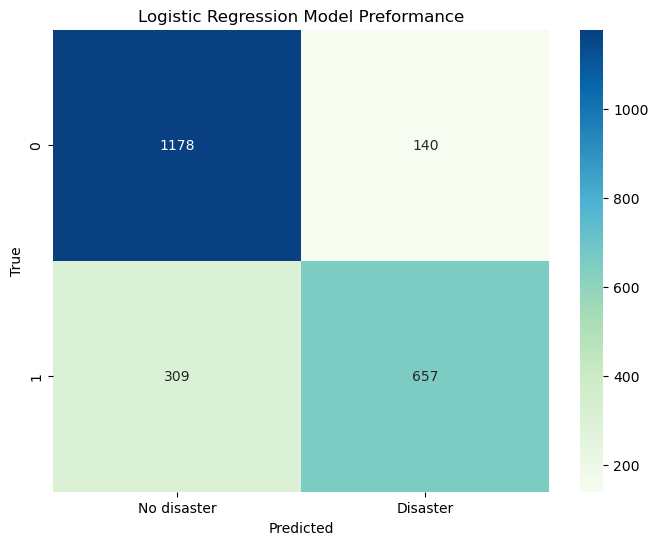

In [13]:
# Calculate LR accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix for correctly/incorrectly prediciting outcome variable
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "GnBu",
           xticklabels = ["No disaster", "Disaster"])
plt.title("Logistic Regression Model Preformance")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Test model with new data 

In [14]:
# Create new data 
new_text = ["BREAKING: Massive earthquake hits the coast",
           "I love watching disaters movies on Netflix",
           "Thousands evacuated as hurricane approaches",
           "Theeesss is a disassterrr",
           "It's windy!",
           "The Palisades fire has damaged over 7,000 structures",
           "I broke my tooth on a jawbreaker"]

# Preprocess new phrases
cleaned_new_text = [preprocess(text) for text in new_text]

# Transform using TF-IDF vectorizer
new_features = tfidf_vectorizer.transform(cleaned_new_text)

# Make predictions 
predictions = lr_model.predict(new_features)

# Check outcomes 
for text, pred in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predictions: {'Real disaster' if pred == 1 else 'Not a real Disaster'}\n")


Text: BREAKING: Massive earthquake hits the coast
Predictions: Real disaster

Text: I love watching disaters movies on Netflix
Predictions: Not a real Disaster

Text: Thousands evacuated as hurricane approaches
Predictions: Real disaster

Text: Theeesss is a disassterrr
Predictions: Not a real Disaster

Text: It's windy!
Predictions: Not a real Disaster

Text: The Palisades fire has damaged over 7,000 structures
Predictions: Not a real Disaster

Text: I broke my tooth on a jawbreaker
Predictions: Not a real Disaster

